# Coverage Estimation

## CMS Data Extraction and Manipulation 

In [1]:
import pandas as pd
import numpy as np
import timeit
import seaborn as sns
import matplotlib.pyplot as plt

### Load CPT level data (Year 2012 - 2015)

In [2]:
# CPT level data, year 2015
start = timeit.default_timer()

df_15 = pd.read_csv('Medicare_Provider_Util_Payment_PUF_CY2015.txt', sep = '\t', header = 0)
df_15['year'] = '2015'
df_15.drop(df_15.index == 0, inplace = True)

stop = timeit.default_timer()
print (stop - start)

/Users/michaelli/anaconda2/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


98.0552530289


In [3]:
df_15.columns.values

array(['npi', 'nppes_provider_last_org_name', 'nppes_provider_first_name',
       'nppes_provider_mi', 'nppes_credentials', 'nppes_provider_gender',
       'nppes_entity_code', 'nppes_provider_street1',
       'nppes_provider_street2', 'nppes_provider_city',
       'nppes_provider_zip', 'nppes_provider_state',
       'nppes_provider_country', 'provider_type',
       'medicare_participation_indicator', 'place_of_service',
       'hcpcs_code', 'hcpcs_description', 'hcpcs_drug_indicator',
       'line_srvc_cnt', 'bene_unique_cnt', 'bene_day_srvc_cnt',
       'average_Medicare_allowed_amt', 'average_submitted_chrg_amt',
       'average_Medicare_payment_amt', 'average_Medicare_standard_amt',
       'year'], dtype=object)

In [4]:
# CPT level data, year 2014
start = timeit.default_timer()

df_14 = pd.read_csv('Medicare_Provider_Util_Payment_PUF_CY2014.txt', sep = '\t', header = 0)
df_14['year'] = '2014'
df_14.drop(df_14.index == 0, inplace = True)

stop = timeit.default_timer()
print (stop - start)

91.2562971115


In [5]:
df_14.columns.values

array(['npi', 'nppes_provider_last_org_name', 'nppes_provider_first_name',
       'nppes_provider_mi', 'nppes_credentials', 'nppes_provider_gender',
       'nppes_entity_code', 'nppes_provider_street1',
       'nppes_provider_street2', 'nppes_provider_city',
       'nppes_provider_zip', 'nppes_provider_state',
       'nppes_provider_country', 'provider_type',
       'medicare_participation_indicator', 'place_of_service',
       'hcpcs_code', 'hcpcs_description', 'hcpcs_drug_indicator',
       'line_srvc_cnt', 'bene_unique_cnt', 'bene_day_srvc_cnt',
       'average_Medicare_allowed_amt', 'average_submitted_chrg_amt',
       'average_Medicare_payment_amt', 'average_Medicare_standard_amt',
       'year'], dtype=object)

In [6]:
# CPT level data, year 2013
start = timeit.default_timer()

df_13 = pd.read_csv('Medicare_Provider_Util_Payment_PUF_CY2013.txt', sep = '\t', header = 0)
df_13['year'] = '2013'
df_13.drop(df_13.index == 0, inplace = True)

stop = timeit.default_timer()
print (stop - start)

94.909514904


In [7]:
df_13.columns.values

array(['NPI', 'NPPES_PROVIDER_LAST_ORG_NAME', 'NPPES_PROVIDER_FIRST_NAME',
       'NPPES_PROVIDER_MI', 'NPPES_CREDENTIALS', 'NPPES_PROVIDER_GENDER',
       'NPPES_ENTITY_CODE', 'NPPES_PROVIDER_STREET1',
       'NPPES_PROVIDER_STREET2', 'NPPES_PROVIDER_CITY',
       'NPPES_PROVIDER_ZIP', 'NPPES_PROVIDER_STATE',
       'NPPES_PROVIDER_COUNTRY', 'PROVIDER_TYPE',
       'MEDICARE_PARTICIPATION_INDICATOR', 'PLACE_OF_SERVICE',
       'HCPCS_CODE', 'HCPCS_DESCRIPTION', 'HCPCS_DRUG_INDICATOR',
       'LINE_SRVC_CNT', 'BENE_UNIQUE_CNT', 'BENE_DAY_SRVC_CNT',
       'AVERAGE_MEDICARE_ALLOWED_AMT', 'STDEV_MEDICARE_ALLOWED_AMT',
       'AVERAGE_SUBMITTED_CHRG_AMT', 'STDEV_SUBMITTED_CHRG_AMT',
       'AVERAGE_MEDICARE_PAYMENT_AMT', 'STDEV_MEDICARE_PAYMENT_AMT', 'year'], dtype=object)

In [8]:
# CPT level, year 2012
start = timeit.default_timer()

df_12 = pd.read_csv('Medicare_Provider_Util_Payment_PUF_CY2012.txt', sep = '\t', header = 0)
df_12['year'] = '2012'
df_12.drop(df_12.index == 0, inplace = True)

stop = timeit.default_timer()
print (stop - start)

87.6871900558


In [9]:
df_12.columns.values

array(['NPI', 'NPPES_PROVIDER_LAST_ORG_NAME', 'NPPES_PROVIDER_FIRST_NAME',
       'NPPES_PROVIDER_MI', 'NPPES_CREDENTIALS', 'NPPES_PROVIDER_GENDER',
       'NPPES_ENTITY_CODE', 'NPPES_PROVIDER_STREET1',
       'NPPES_PROVIDER_STREET2', 'NPPES_PROVIDER_CITY',
       'NPPES_PROVIDER_ZIP', 'NPPES_PROVIDER_STATE',
       'NPPES_PROVIDER_COUNTRY', 'PROVIDER_TYPE',
       'MEDICARE_PARTICIPATION_INDICATOR', 'PLACE_OF_SERVICE',
       'HCPCS_CODE', 'HCPCS_DESCRIPTION', 'HCPCS_DRUG_INDICATOR',
       'LINE_SRVC_CNT', 'BENE_UNIQUE_CNT', 'BENE_DAY_SRVC_CNT',
       'AVERAGE_MEDICARE_ALLOWED_AMT', 'STDEV_MEDICARE_ALLOWED_AMT',
       'AVERAGE_SUBMITTED_CHRG_AMT', 'STDEV_SUBMITTED_CHRG_AMT',
       'AVERAGE_MEDICARE_PAYMENT_AMT', 'STDEV_MEDICARE_PAYMENT_AMT', 'year'], dtype=object)

### Load and explore NPI level aggregated data (year 2012 - 2015)

In [15]:
# NPI level aggregated data, year 2012
start = timeit.default_timer()

df_12_npi = pd.read_excel('Medicare-Physician-and-Other-Supplier-NPI-Aggregate-CY2012.xlsx', sheetname= 'DATA', header= 0)
df_12_npi['year'] = '2012'

stop = timeit.default_timer()
print (stop - start)

685.731369972


In [16]:
df_12_npi.columns.values

array([u'NPI', u'NPPES Provider Last Name / Organization Name',
       u'NPPES Provider First Name', u'NPPES Provider Middle Initial',
       u'NPPES Credentials', u'NPPES Provider Gender',
       u'NPPES Entity Code', u'NPPES Provider Street Address 1',
       u'NPPES Provider Street Address 2', u'NPPES Provider City',
       u'NPPES Provider Zip Code', u'NPPES Provider State',
       u'NPPES Provider Country ', u'Provider Type',
       u'Medicare Participation Indicator', u'Number of HCPCS',
       u'Number of Services', u'Number of Unique Beneficiaries',
       u'Total Submitted Charges', u'Total Medicare Allowed Amount',
       u'Total Medicare Payment Amount', u'Drug Suppress Indicator',
       u'Number of HCPCS Associated With Drug Services',
       u'Number of Drug Services',
       u'Number of Unique Beneficiaries With Drug Services',
       u'Total Drug Submitted Charges',
       u'Total Drug Medicare Allowed Amount',
       u'Total Drug Medicare Payment Amount',
       u'Medi

In [20]:
# fill null value with 0
# and create a dataframe that only keeps NPI and age group number
df_12_npi['Number of Beneficiaries Age Less 65 '].fillna(0, inplace = True)
df_12_npi['Number of Beneficiaries Age 65 to 74'].fillna(0, inplace = True)
df_12_npi['Number of Beneficiaries Age 75 to 84'].fillna(0, inplace = True)
df_12_npi['Number of Beneficiaries Age Greater 84'].fillna(0, inplace = True)
df_12_npi_age = df_12_npi[['NPI', 'Number of Beneficiaries Age Less 65 ', 'Number of Beneficiaries Age 65 to 74', 'Number of Beneficiaries Age 75 to 84', 'Number of Beneficiaries Age Greater 84', 'year']]

In [18]:
# NPI level aggregated data, year 2013
start = timeit.default_timer()

df_13_npi = pd.read_excel('Medicare-Physician-and-Other-Supplier-NPI-Aggregate-CY2013.xlsx', sheetname= 'DATA', header= 0)
df_13_npi['year'] = '2013'

stop = timeit.default_timer()
print (stop - start)

680.743115902


In [19]:
df_13_npi.columns.values

array([u'NPI', u'NPPES Provider Last Name / Organization Name',
       u'NPPES Provider First Name', u'NPPES Provider Middle Initial',
       u'NPPES Credentials', u'NPPES Provider Gender',
       u'NPPES Entity Code', u'NPPES Provider Street Address 1',
       u'NPPES Provider Street Address 2', u'NPPES Provider City',
       u'NPPES Provider Zip Code', u'NPPES Provider State',
       u'NPPES Provider Country ', u'Provider Type',
       u'Medicare Participation Indicator', u'Number of HCPCS',
       u'Number of Services', u'Number of Unique Beneficiaries',
       u'Total Submitted Charges', u'Total Medicare Allowed Amount',
       u'Total Medicare Payment Amount', u'Drug Suppress Indicator',
       u'Number of HCPCS Associated With Drug Services',
       u'Number of Drug Services',
       u'Number of Unique Beneficiaries With Drug Services',
       u'Total Drug Submitted Charges',
       u'Total Drug Medicare Allowed Amount',
       u'Total Drug Medicare Payment Amount',
       u'Medi

In [21]:
# fill null value with 0
# and create a dataframe that only keeps year, NPI and age group number
df_13_npi['Number of Beneficiaries Age Less 65 '].fillna(0, inplace = True)
df_13_npi['Number of Beneficiaries Age 65 to 74'].fillna(0, inplace = True)
df_13_npi['Number of Beneficiaries Age 75 to 84'].fillna(0, inplace = True)
df_13_npi['Number of Beneficiaries Age Greater 84'].fillna(0, inplace = True)
df_13_npi_age = df_13_npi[['NPI', 'Number of Beneficiaries Age Less 65 ', 'Number of Beneficiaries Age 65 to 74', 'Number of Beneficiaries Age 75 to 84', 'Number of Beneficiaries Age Greater 84', 'year']]

In [23]:
# NPI level aggregated data, year 2014
start = timeit.default_timer()

df_14_npi = pd.read_csv('Medicare_Physician_and_Other_Supplier_NPI_Aggregate_CY2014.txt', sep = '\t', header= 0)
df_14_npi['year'] = '2014'

stop = timeit.default_timer()
print (stop - start)

14.6418099403


In [24]:
df_14_npi.columns.values

array(['npi', 'nppes_provider_last_org_name', 'nppes_provider_first_name',
       'nppes_provider_mi', 'nppes_credentials', 'nppes_provider_gender',
       'nppes_entity_code', 'nppes_provider_street1',
       'nppes_provider_street2', 'nppes_provider_city',
       'nppes_provider_zip', 'nppes_provider_state',
       'nppes_provider_country', 'provider_type',
       'medicare_participation_indicator', 'number_of_hcpcs',
       'total_services', 'total_unique_benes', 'total_submitted_chrg_amt',
       'total_medicare_allowed_amt', 'total_medicare_payment_amt',
       'total_medicare_stnd_amt', 'drug_suppress_indicator',
       'number_of_drug_hcpcs', 'total_drug_services',
       'total_drug_unique_benes', 'total_drug_submitted_chrg_amt',
       'total_drug_medicare_allowed_amt',
       'total_drug_medicare_payment_amt', 'total_drug_medicare_stnd_amt',
       'med_suppress_indicator', 'number_of_med_hcpcs',
       'total_med_services', 'total_med_unique_benes',
       'total_med_submitt

In [26]:
# fill null value with 0
# and create a dataframe that only keeps year, NPI and age group number
df_14_npi['beneficiary_age_less_65_count'].fillna(0, inplace = True)
df_14_npi['beneficiary_age_65_74_count'].fillna(0, inplace = True)
df_14_npi['beneficiary_age_75_84_count'].fillna(0, inplace = True)
df_14_npi['beneficiary_age_greater_84_count'].fillna(0, inplace = True)
df_14_npi_age = df_14_npi[['npi', 'beneficiary_age_less_65_count', 'beneficiary_age_65_74_count', 'beneficiary_age_75_84_count', 'beneficiary_age_greater_84_count', 'year']]

In [28]:
# NPI level aggregated data, year 2015
start = timeit.default_timer()

df_15_npi = pd.read_csv('Medicare_Physician_and_Other_Supplier_NPI_Aggregate_CY2015.txt', sep = '\t', header= 0)
df_15_npi['year'] = '2015'

stop = timeit.default_timer()
print (stop - start)

15.5432770252


In [31]:
df_15_npi.columns.values

array(['npi', 'nppes_provider_last_org_name', 'nppes_provider_first_name',
       'nppes_provider_mi', 'nppes_credentials', 'nppes_provider_gender',
       'nppes_entity_code', 'nppes_provider_street1',
       'nppes_provider_street2', 'nppes_provider_city',
       'nppes_provider_zip', 'nppes_provider_state',
       'nppes_provider_country', 'provider_type',
       'medicare_participation_indicator', 'number_of_hcpcs',
       'total_services', 'total_unique_benes', 'total_submitted_chrg_amt',
       'total_medicare_allowed_amt', 'total_medicare_payment_amt',
       'total_medicare_stnd_amt', 'drug_suppress_indicator',
       'number_of_drug_hcpcs', 'total_drug_services',
       'total_drug_unique_benes', 'total_drug_submitted_chrg_amt',
       'total_drug_medicare_allowed_amt',
       'total_drug_medicare_payment_amt', 'total_drug_medicare_stnd_amt',
       'med_suppress_indicator', 'number_of_med_hcpcs',
       'total_med_services', 'total_med_unique_benes',
       'total_med_submitt

In [33]:
# fill null value with 0
# and create a dataframe that only keeps year, NPI and age group number
df_15_npi['beneficiary_age_less_65_count'].fillna(0, inplace = True)
df_15_npi['beneficiary_age_65_74_count'].fillna(0, inplace = True)
df_15_npi['beneficiary_age_75_84_count'].fillna(0, inplace = True)
df_15_npi['beneficiary_age_greater_84_count'].fillna(0, inplace = True)
df_15_npi_age = df_15_npi[['npi', 'beneficiary_age_less_65_count', 'beneficiary_age_65_74_count', 'beneficiary_age_75_84_count', 'beneficiary_age_greater_84_count', 'year']]

In [39]:
# unify column names and concatenate age dataframes together
# groupby npi and aggeregate years together
start = timeit.default_timer()

df_12_npi_age.rename(columns = {'NPI': 'npi', 'Number of Beneficiaries Age Less 65 ': 'beneficiary_age_less_65_count', 'Number of Beneficiaries Age 65 to 74': 'beneficiary_age_65_74_count', 'Number of Beneficiaries Age 75 to 84': 'beneficiary_age_75_84_count', 'Number of Beneficiaries Age Greater 84': 'beneficiary_age_greater_84_count'}, inplace = True)
df_13_npi_age.rename(columns = {'NPI': 'npi', 'Number of Beneficiaries Age Less 65 ': 'beneficiary_age_less_65_count', 'Number of Beneficiaries Age 65 to 74': 'beneficiary_age_65_74_count', 'Number of Beneficiaries Age 75 to 84': 'beneficiary_age_75_84_count', 'Number of Beneficiaries Age Greater 84': 'beneficiary_age_greater_84_count'}, inplace = True)

df_npi_age = df_15_npi_age.append([df_14_npi_age, df_13_npi_age, df_12_npi_age])
df_npi_age.reset_index(drop = True, inplace = True)
df_npi_age = df_npi_age[['npi', 'beneficiary_age_less_65_count', 'beneficiary_age_65_74_count', 'beneficiary_age_75_84_count', 'beneficiary_age_greater_84_count']].groupby('npi')['beneficiary_age_less_65_count', 'beneficiary_age_65_74_count', 'beneficiary_age_75_84_count', 'beneficiary_age_greater_84_count'].apply(np.sum)

stop = timeit.default_timer()
print (stop - start)


156.150655985


In [40]:
df_npi_age.head()

,beneficiary_age_less_65_count,beneficiary_age_65_74_count,beneficiary_age_75_84_count,beneficiary_age_greater_84_count
npi,,,,
1003000126,520.0,897.0,978.0,693.0
1003000134,451.0,7110.0,6078.0,3087.0
1003000142,344.0,174.0,42.0,25.0
1003000381,0.0,19.0,0.0,0.0
1003000407,281.0,378.0,563.0,543.0


In [41]:
# calculate npi level age percentage (age 65 and above) and print summary statistics
df_npi_age['age_perc'] = 1 - df_npi_age['beneficiary_age_less_65_count'] / (df_npi_age['beneficiary_age_less_65_count'] + df_npi_age['beneficiary_age_65_74_count'] + df_npi_age['beneficiary_age_75_84_count'] + df_npi_age['beneficiary_age_greater_84_count'])
df_npi_age['age_perc'].describe()

count    1.063431e+06
mean     7.986571e-01
std      2.291580e-01
min      0.000000e+00
25%      7.421978e-01
50%      8.586515e-01
75%      9.545455e-01
max      1.000000e+00
Name: age_perc, dtype: float64

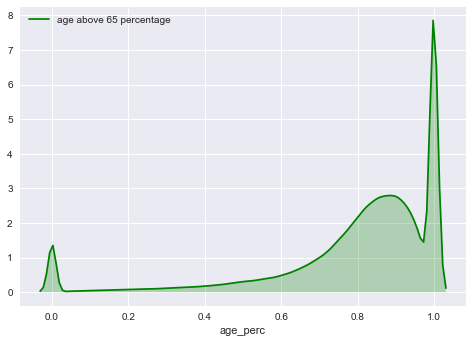

In [44]:
# plot the distribution of age percentage
plt.clf()
sns.distplot(df_npi_age['age_perc'], hist=False, color="g", kde_kws={"shade": True, 'label': 'age above 65 percentage'})
plt.show()

### Concatenate cpt level data together and join the npi_age table

In [45]:
# convert column names to lower case and select relevant columns
df_13.columns = df_13.columns.str.lower()
df_12.columns = df_12.columns.str.lower()

cols_to_keep = ['npi', 'hcpcs_code', 'hcpcs_description', 'year', 'bene_unique_cnt', 'line_srvc_cnt']

df_15 = df_15[cols_to_keep]
df_14 = df_14[cols_to_keep]
df_13 = df_13[cols_to_keep]
df_12 = df_12[cols_to_keep]

In [49]:
# concatenate cpt level data and join age percentage
df_cpt = df_15.append([df_14, df_13, df_12])
df_cpt.reset_index(drop = True, inplace = True)
df_npi_age.reset_index(drop = False, inplace = True)
df_cpt = df_cpt.merge(df_npi_age[['npi', 'age_perc']], how = 'left', on = 'npi')

In [53]:
# compute count of age 65 and above
df_cpt['bene_unique_cnt_age_65_above'] = np.round(df_cpt['bene_unique_cnt'] * df_cpt['age_perc'])

### Group cpt level data by hcpc codes

In [77]:
# group cpt level data by hcpc codes, description, keep beneficiary counts and aged 65 above beneficiary counts
df_cpt_grouped = df_cpt[['hcpcs_code', 'hcpcs_description', 'bene_unique_cnt', 'bene_unique_cnt_age_65_above']].groupby(['hcpcs_code', 'hcpcs_description'])['bene_unique_cnt', 'bene_unique_cnt_age_65_above'].apply(np.sum)

In [56]:
df_cpt_grouped.head(30)

,,bene_unique_cnt,bene_unique_cnt_age_65_above
hcpcs_code,hcpcs_description,,
00100,Anesthesia for procedure on salivary gland with biopsy,198.0,165.0
00102,Anesthesia for procedure to repair lip defect present at birth,146.0,133.0
00103,Anesthesia for procedure on eyelid,280228.0,252997.0
00104,Anesthesia for electric shock treatment,264208.0,192100.0
00120,Anesthesia for biopsy of external middle and inner ear,7828.0,6585.0
00126,Anesthesia for incision of ear drum,2598.0,2231.0
00140,Anesthesia for procedure on eye,319196.0,289249.0
00142,Anesthesia for lens surgery,6979653.0,6196594.0
00144,Anesthesia for procedure on eye for corneal transplant,37294.0,34078.0


In [58]:
df_cpt_grouped.shape

(8497, 2)

### Save files to csv for future use

In [60]:
# save npi level raw data of year 2012 and 2013 in csv format for easy loading
df_12_npi.to_csv('Medicare-Physician-and-Other-Supplier-NPI-Aggregate-CY2012.csv', sep = ',', index = False, encoding='utf-8')
df_13_npi.to_csv('Medicare-Physician-and-Other-Supplier-NPI-Aggregate-CY2013.csv', sep = ',', index = False, encoding='utf-8')

In [61]:
# save npi level age group raw data in csv format
df_npi_age.to_csv('Medicare-Physician-and-Other-Supplier-NPI-Aggregate_Age_Group.csv', sep = ',', index = False, encoding = 'utf-8')

In [62]:
# save cpt level grouped data in csv format
df_cpt_grouped.to_csv('cms_data_groupedby_hcpcs_cpt_codes_2012_to_2015.csv', sep = ',', index = True)

### Plot beneficiary counts in cpt level

In [79]:
df_cpt_grouped.reset_index(drop = False, inplace = True)
df_cpt_grouped.head()

,hcpcs_code,hcpcs_description,bene_unique_cnt,bene_unique_cnt_age_65_above
0,00100,Anesthesia for procedure on salivary gland wit...,198.0,165.0
1,00102,Anesthesia for procedure to repair lip defect ...,146.0,133.0
2,00103,Anesthesia for procedure on eyelid,280228.0,252997.0
3,00104,Anesthesia for electric shock treatment,264208.0,192100.0
4,00120,Anesthesia for biopsy of external middle and i...,7828.0,6585.0


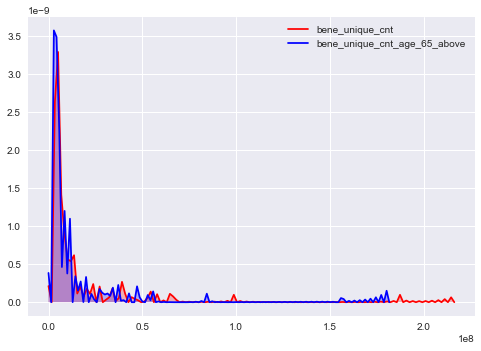

In [81]:
# plot beneficiary for 2 age groups distribution
plt.clf()
sns.kdeplot(df_cpt_grouped['bene_unique_cnt'], shade=True, legend= True, color = 'r')
sns.kdeplot(df_cpt_grouped['bene_unique_cnt_age_65_above'], shade=True, legend= True, color = 'b')
plt.show()